<a href="https://colab.research.google.com/github/OscarRojasG/ADA-Informes/blob/main/Informe10-TopologicalSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Topological Sort

## 2.1 Código

### Funciones auxiliares

In [304]:
import networkx as nx
import matplotlib.pyplot as plt

def graph_to_nxdigraph(graph):
  nxdigraph = nx.DiGraph()

  for i in graph.keys():
    nxdigraph.add_node(i, symbol=None, order=None, state=0)
    for v in graph[i]:
      nxdigraph.add_node(v, symbol=None, order=None, state=0)
      nxdigraph.add_edge(i, v)

  for n in nxdigraph.nodes():
    nxdigraph.nodes[n]['symbol'] = chr(ord('a') + n)

  return nxdigraph

def draw_graph(G):
  labels = dict()

  for i in G.nodes():
    labels[i] = G.nodes[i]['symbol'] + '\n' + str(G.nodes[i]['order'])

  pos = nx.spring_layout(G,k=10,seed=1)
  nx.draw(G, pos, with_labels=True, labels=labels, font_size=10,
          node_size=1000, node_color='white', edgecolors='black')
  plt.show()
  plt.close()

### Topological Sort (DFS iterativo)

In [264]:
from termcolor import colored

# 0: No descubierto
# 1: Descubierto
# 2: Visitado

def DFS_iterativo(G, initial, cont, verbose=False):
  S = list()
  S.append(initial)

  while len(S) > 0:
    n = S.pop()

    if G.nodes[n]['state'] == 0:
      G.nodes[n]['state'] = 1
      S.append(n)

      adj_list = list(reversed(list(G[n])))

      if verbose:
        print(f"Obteniendo nodos adyacentes de ", end='')
        print(f"{colored(G.nodes[n]['symbol'], 'blue')}: ", end='')
        for adj in range(len(adj_list)-1):
          print(G.nodes[adj_list[adj]]['symbol'], end='')
          print(', ', end='')
        if len(adj_list) > 0:
          print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
        else:
          print('-', end='')
        print()

      for adj in adj_list:
        if G.nodes[adj]['state'] == 0:
          S.append(adj)

    elif G.nodes[n]['state'] == 1:
      G.nodes[n]['order'] = cont
      G.nodes[n]['state'] = 2

      if verbose:
        print(f"Marcando nodo {colored(G.nodes[n]['symbol'], 'blue')} ", end='')
        print(f"con etiqueta {colored(cont, 'magenta')}")

      cont += 1

  return cont

Orden topológico:


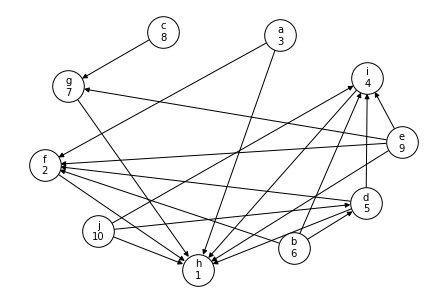

In [308]:
def topological_sort_iterativo(G, visualize=False, verbose=False):
  cont = 1

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      if verbose == True:
        if cont == 1:
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      cont = DFS_iterativo(G, n, cont, verbose)

  if verbose: print()

  if verbose or visualize:
    print("Orden topológico:")
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_iterativo(G, True)

### Topological Sort (DFS recursivo)

In [300]:
from networkx.linalg import adj_matrix
def DFS_recursivo(G, initial, cont, verbose=False):
  G.nodes[initial]['state'] = 1

  adj_list = list(reversed(list(G[initial])))

  if verbose:
    print(f"Obteniendo nodos adyacentes de ", end='')
    print(f"{colored(G.nodes[initial]['symbol'], 'blue')}: ", end='')
    for adj in range(len(adj_list)-1):
      print(G.nodes[adj_list[adj]]['symbol'], end='')
      print(', ', end='')
    if len(adj_list) > 0:
      print(G.nodes[adj_list[len(adj_list)-1]]['symbol'], end='')
    else:
      print('-', end='')
    print()

  for adj in adj_list:
    if G.nodes[adj]['state'] == 0:
      if verbose:
        print("Llamando recursivamente a DFS con nodo inicial ", end='')
        print(colored(G.nodes[adj]['symbol'], 'blue'))
      cont = DFS_recursivo(G, adj, cont, verbose)

  G.nodes[initial]['order'] = cont
  G.nodes[initial]['state'] = 2

  if verbose:
    print(f"Marcando nodo {colored(G.nodes[initial]['symbol'], 'blue')} ", end='')
    print(f"con etiqueta {colored(cont, 'magenta')}")

  cont += 1

  return cont  

Orden topológico:


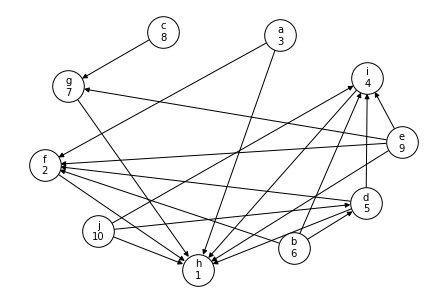

In [309]:
def topological_sort_recursivo(G, visualize=False, verbose=False):
  cont = 1

  for n in G.nodes():
    if G.nodes[n]['state'] == 0:
      if verbose == True:
        if cont == 1:
          print("Comenzando recorrido post-orden desde el nodo ", end='')
        else:
          print("\nContinuando recorrido post-orden desde el nodo ", end='')
        print(colored(G.nodes[n]['symbol'], 'blue'))

      cont = DFS_recursivo(G, n, cont, verbose)

  if verbose: print()

  if verbose or visualize:
    print("Orden topológico:")
    draw_graph(G)

graph = {
    0: [5,7],
    1: [3,8,5],
    2: [6],
    3: [5,7,8],
    4: [6,8,7,5],
    5: [7],
    6: [7],
    8: [7],
    9: [7,3,8]
}

G = graph_to_nxdigraph(graph)
topological_sort_recursivo(G, True)

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en los pasos de cada algoritmo:

In [99]:
from collections import defaultdict
import networkx as nx
import math
import random

# Crea un grafo sin ciclos de nodos de 0 a V - 1
# Retorna un dicionario [defaultdict(list)] 
# de key valor del nodo (0 a V - 1) y de value una 
# lista con los nodos a los cuales se conecta
def graph_instance_creator(V):
  nodes = random.sample(range(0, V), V)
  div = int(math.ceil(V / 4))

  current_div = div
  graph = defaultdict(list)
  for i in reversed(range(len(nodes))):
    selectables = []
    if (len(nodes) - current_div <= 0):
      selectables = random.sample(nodes, random.randint(1, len(nodes)))
    else:
      population = nodes[:len(nodes)-current_div]
      end = len(population) if len(population) < 4 else 4
      selectables = random.sample(population, random.randint(1, end))
    for selectable in selectables:
      if (nodes[i] != selectable and not selectable in graph[nodes[i]]):
        graph[nodes[i]].append(selectable)
    if (i < len(nodes) - current_div):
      current_div += div

  return graph

Comenzando recorrido post-orden desde el nodo d
Obteniendo nodos adyacentes de d: j, b
Obteniendo nodos adyacentes de b: a
Obteniendo nodos adyacentes de a: -
Marcando nodo a con etiqueta 1
Marcando nodo b con etiqueta 2
Obteniendo nodos adyacentes de j: c, a
Obteniendo nodos adyacentes de c: a
Marcando nodo c con etiqueta 3
Marcando nodo j con etiqueta 4
Marcando nodo d con etiqueta 5

Continuando recorrido post-orden desde el nodo h
Obteniendo nodos adyacentes de h: c, e
Obteniendo nodos adyacentes de e: c, a, b, j
Marcando nodo e con etiqueta 6
Marcando nodo h con etiqueta 7

Continuando recorrido post-orden desde el nodo f
Obteniendo nodos adyacentes de f: b, g, i, c
Obteniendo nodos adyacentes de i: b, c
Marcando nodo i con etiqueta 8
Obteniendo nodos adyacentes de g: j, a, c
Marcando nodo g con etiqueta 9
Marcando nodo f con etiqueta 10

Orden topológico:


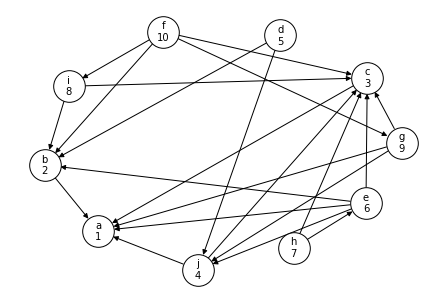

In [310]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

topological_sort_iterativo(G, True, True)

Comenzando recorrido post-orden desde el nodo b
Obteniendo nodos adyacentes de b: g, d
Llamando recursivamente a DFS con nodo inicial g
Obteniendo nodos adyacentes de g: d, j, f
Llamando recursivamente a DFS con nodo inicial d
Obteniendo nodos adyacentes de d: j, f, e
Llamando recursivamente a DFS con nodo inicial j
Obteniendo nodos adyacentes de j: -
Marcando nodo j con etiqueta 1
Llamando recursivamente a DFS con nodo inicial f
Obteniendo nodos adyacentes de f: j
Marcando nodo f con etiqueta 2
Llamando recursivamente a DFS con nodo inicial e
Obteniendo nodos adyacentes de e: j
Marcando nodo e con etiqueta 3
Marcando nodo d con etiqueta 4
Marcando nodo g con etiqueta 5
Marcando nodo b con etiqueta 6

Continuando recorrido post-orden desde el nodo i
Obteniendo nodos adyacentes de i: c, j
Llamando recursivamente a DFS con nodo inicial c
Obteniendo nodos adyacentes de c: a, f, e, j
Llamando recursivamente a DFS con nodo inicial a
Obteniendo nodos adyacentes de a: e
Marcando nodo a con et

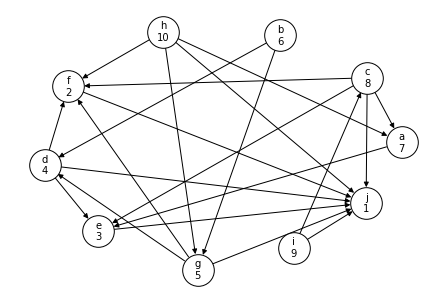

In [311]:
G = graph_instance_creator(10)
G = graph_to_nxdigraph(G)

topological_sort_recursivo(G, True, True)